In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

coviddaily = pd.read_csv("data/coviddaily.csv", parse_dates=["casedate"])

In [2]:
coviddaily.sample(2, random_state=1).T


,628,26980
iso_code,AND,PRT
casedate,2020-03-15 00:00:00,2022-12-04 00:00:00
location,Andorra,Portugal
continent,Europe,Europe
new_cases,1.0,3963.0
new_deaths,0.0,69.0
population,79843,10270857
pop_density,163.755,112.371
median_age,NaN,46.2
gdp_per_capita,NaN,27936.896


In [3]:
coviddailytotals = coviddaily.loc[coviddaily.casedate.between('2023-07-01', '2024-03-03')].groupby(['casedate'])[['new_cases', 'new_deaths']].sum().reset_index()

In [4]:
coviddailytotals.sample(7, random_state=1)

,casedate,new_cases,new_deaths
27,2024-01-07,181487.0,1353.0
3,2023-07-23,254984.0,596.0
22,2023-12-03,282319.0,1535.0
18,2023-11-05,158346.0,1162.0
23,2023-12-10,333155.0,1658.0
17,2023-10-29,144325.0,905.0
21,2023-11-26,238282.0,1287.0


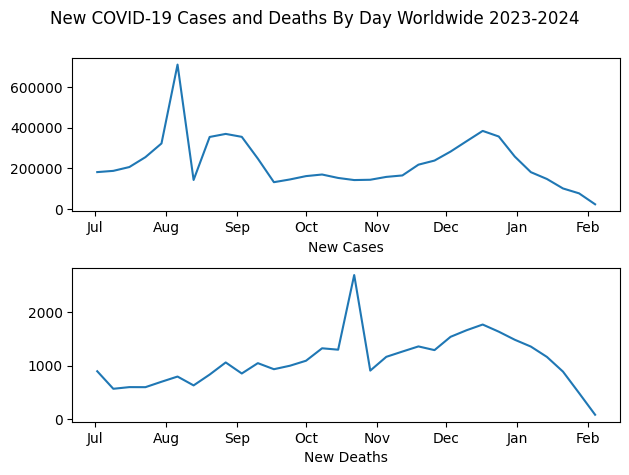

In [5]:
fig = plt.figure()
plt.suptitle("New COVID-19 Cases and Deaths By Day Worldwide 2023-2024")
ax1 = plt.subplot(2,1,1)
ax1.plot(coviddailytotals.casedate, coviddailytotals.new_cases)
ax1.xaxis.set_major_formatter(DateFormatter("%b"))
ax1.set_xlabel("New Cases")
ax2 = plt.subplot(2,1,2)
ax2.plot(coviddailytotals.casedate, coviddailytotals.new_deaths)
ax2.xaxis.set_major_formatter(DateFormatter("%b"))
ax2.set_xlabel("New Deaths")
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

In [6]:
regiontotals = coviddaily.loc[coviddaily.casedate.between('2023-07-01', '2024-03-03')].groupby(['casedate', 'region'])[['new_cases', 'new_deaths']].sum().reset_index()

regiontotals.sample(7, random_state=1)


,casedate,region,new_cases,new_deaths
110,2023-08-13,West Asia,2313.0,25.0
147,2023-09-03,Central Asia,600.0,7.0
494,2024-02-04,Oceania / Aus,12594.0,38.0
325,2023-11-19,East Asia,20088.0,15.0
189,2023-09-17,West Africa,85.0,0.0
218,2023-10-01,South America,4203.0,54.0
469,2024-01-21,Oceania / Aus,17503.0,129.0


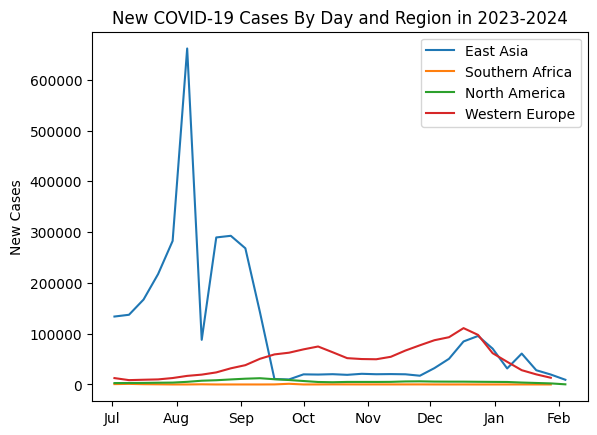

In [7]:
showregions = ['East Asia','Southern Africa','North America','Western Europe']
for j in range(len(showregions)):
    rt = regiontotals.loc[regiontotals.region==showregions[j],
    ['casedate','new_cases']]
    plt.plot(rt.casedate, rt.new_cases,
    label=showregions[j])
plt.title("New COVID-19 Cases By Day and Region in 2023-2024")
plt.gca().get_xaxis().set_major_formatter(DateFormatter("%b"))
plt.ylabel("New Cases")
plt.legend()
plt.show()

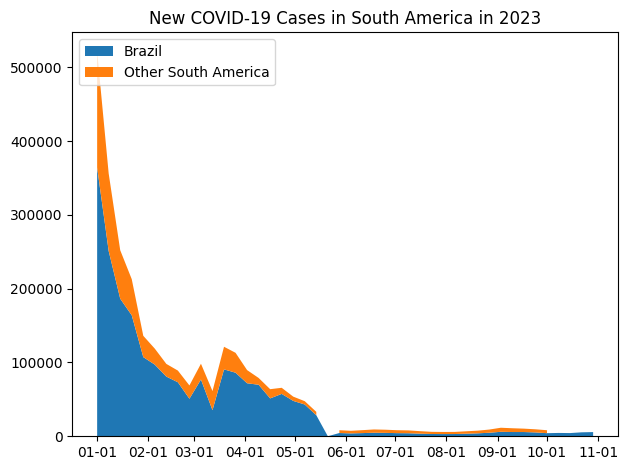

In [ ]:
sa = \
    coviddaily.loc[(coviddaily.casedate.\
    between('2023-01-01','2023-10-31')) & \
    (coviddaily.region=='South America'),
    ['casedate','new_cases']].\
    groupby(['casedate'])\
    [['new_cases']].\
    sum().\
    reset_index().\
    rename(columns={'new_cases':'sacases'})
br = coviddaily.loc[(coviddaily.\
    location=='Brazil') & \
    (coviddaily.casedate. \
    between('2023-01-01','2023-10-31')),
    ['casedate','new_cases']].\
        rename(columns={'new_cases':'brcases'})
sa = pd.merge(sa, br, left_on=['casedate'], right_on=['casedate'],
how="left")
sa.fillna({"sacases": 0},
inplace=True)
sa['sacasesnobr'] = sa.sacases-sa.brcases
fig = plt.figure()
ax = plt.subplot()
ax.stackplot(sa.casedate, sa.sacases, sa.sacasesnobr,
labels=['Brazil','Other South America'])
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
plt.title("New COVID-19 Cases in South America in 2023")
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()